In [30]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import math

In [31]:
training_data = pd.read_csv(r"C:\Users\ardas\AppData\Roaming\Microsoft\Windows\Start Menu\Programs\Anaconda3 (64-bit)\data\training2.csv")
training_data2 = pd.read_csv(r"C:\Users\ardas\AppData\Roaming\Microsoft\Windows\Start Menu\Programs\Anaconda3 (64-bit)\data\training2.csv")
training_data3 = pd.read_csv(r"C:\Users\ardas\AppData\Roaming\Microsoft\Windows\Start Menu\Programs\Anaconda3 (64-bit)\data\training2.csv")

test_data = pd.read_csv(r"C:\Users\ardas\AppData\Roaming\Microsoft\Windows\Start Menu\Programs\Anaconda3 (64-bit)\data\testing2.csv")
test_data2 = pd.read_csv(r"C:\Users\ardas\AppData\Roaming\Microsoft\Windows\Start Menu\Programs\Anaconda3 (64-bit)\data\testing2.csv")
test_data3 = pd.read_csv(r"C:\Users\ardas\AppData\Roaming\Microsoft\Windows\Start Menu\Programs\Anaconda3 (64-bit)\data\testing2.csv")


In [47]:
setosa_number = 0
versicolor_number = 0
virginica_number = 0
setosa_length = 0
versicolor_length = 0
virginica_length = 0
setosa_width = 0
versicolor_width = 0
virginica_width = 0

#Calculating means of each classes' PetalLength and PetalWidth

for index, row in training_data.iterrows():
    if row["Species"] == "Iris-setosa":
        setosa_number += 1
        setosa_length += row["PetalLengthCm"]
        setosa_width += row["PetalWidthCm"]
    elif row["Species"] == "Iris-versicolor":
        versicolor_number += 1
        versicolor_length += row["PetalLengthCm"]
        versicolor_width += row["PetalWidthCm"]
    elif row["Species"] == "Iris-virginica":
        virginica_number += 1
        virginica_length += row["PetalLengthCm"]
        virginica_width += row["PetalWidthCm"]

        
#Setosa means
setosa_length_mean = setosa_length/setosa_number
setosa_width_mean = setosa_width/setosa_number

#Versicolor means
versicolor_length_mean = versicolor_length/versicolor_number
versicolor_width_mean = versicolor_width/versicolor_number

#Virginica means
virginica_length_mean = virginica_length/virginica_number
virginica_width_mean = virginica_width/virginica_number



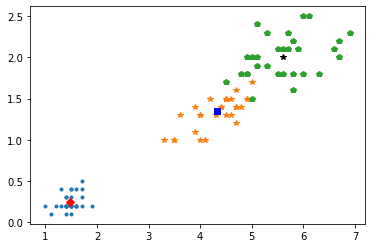

In [48]:

#Plotting instances of each species

setosa_data = training_data[training_data["Species"]=="Iris-setosa"]
plt.plot(setosa_data["PetalLengthCm"],setosa_data["PetalWidthCm"],".", label="Iris-setosa")
versicolar_data = training_data[training_data["Species"]=="Iris-versicolor"]
plt.plot(versicolar_data["PetalLengthCm"],versicolar_data["PetalWidthCm"],"*",label="Iris-versicolor")
virginica_data = training_data[training_data["Species"]=="Iris-virginica"]
plt.plot(virginica_data["PetalLengthCm"],virginica_data["PetalWidthCm"],"p",label="Iris-virginica")
plt.plot(setosa_length_mean,setosa_width_mean,"D", c="red",label="Iris-setosa-mean")
plt.plot(versicolor_length_mean,versicolor_width_mean,"s", c="blue",label="Iris-versicolor-mean")
plt.plot(virginica_length_mean,virginica_width_mean,"*", c="black",label="Iris-virginica-mean")

In [33]:
#Calculating each instances' distances between means

for index, row in training_data2.iterrows():
    dist_setosa = math.sqrt((setosa_length_mean - row["PetalLengthCm"])**2 + (setosa_width_mean-row["PetalWidthCm"])**2) 
    dist_versicolor = math.sqrt((versicolor_length_mean - row["PetalLengthCm"])**2 + (versicolor_width_mean-row["PetalWidthCm"])**2)
    dist_virginica = math.sqrt((virginica_length_mean - row["PetalLengthCm"])**2 + (virginica_width_mean-row["PetalWidthCm"])**2)

#Assigning each instance according to it's the nearest mean's class     
    
    if dist_setosa < dist_versicolor and dist_setosa < dist_virginica :
        training_data2.iloc[index,2] = "Iris-setosa"
    
    elif dist_versicolor < dist_setosa and dist_versicolor < dist_virginica :
        training_data2.iloc[index,2] = "Iris-versicolor"
        
    elif dist_virginica < dist_setosa and dist_virginica < dist_versicolor :
        training_data2.iloc[index,2] = "Iris-virginica"
        

In [34]:
#Checking each instance it is assigned correctly or not by comparing with training data 
#and creating 3x3 confusion matrix

m = np.zeros((3, 3), dtype=int)
for index, row in training_data2.iterrows():
    
    if row["Species"] == "Iris-setosa":
        if training_data.iloc[index,2] == "Iris-setosa":
            m[0,0] += 1
        elif training_data.iloc[index,2] == "Iris-versicolor":
            m[0,1] += 1
        elif training_data.iloc[index,2] == "Iris-virginica":
            m[0,2] += 1
    
    elif row["Species"] == "Iris-versicolor":
        if training_data.iloc[index,2] == "Iris-setosa":
            m[1,0] += 1
        elif training_data.iloc[index,2] == "Iris-versicolor":
            m[1,1] += 1
        elif training_data.iloc[index,2] == "Iris-virginica":
            m[1,2] += 1
            
    elif row["Species"] == "Iris-virginica":
        if training_data.iloc[index,2] == "Iris-setosa":
            m[2,0] += 1
        elif training_data.iloc[index,2] == "Iris-versicolor":
            m[2,1] += 1
        elif training_data.iloc[index,2] == "Iris-virginica":
            m[2,2] += 1

print(m)

[[30  0  0]
 [ 0 29  5]
 [ 0  1 25]]


In [35]:
#Calculating each instances' distances between means

for index, row in test_data2.iterrows():
    dist_setosa = math.sqrt((setosa_length_mean - row["PetalLengthCm"])**2 + (setosa_width_mean-row["PetalWidthCm"])**2) 
    dist_versicolor = math.sqrt((versicolor_length_mean - row["PetalLengthCm"])**2 + (versicolor_width_mean-row["PetalWidthCm"])**2)
    dist_virginica = math.sqrt((virginica_length_mean - row["PetalLengthCm"])**2 + (virginica_width_mean-row["PetalWidthCm"])**2)

#Assigning each instance according to it's the nearest mean's class  

    if dist_setosa < dist_versicolor and dist_setosa < dist_virginica :
        test_data2.iloc[index,2] = "Iris-setosa"
    
    elif dist_versicolor < dist_setosa and dist_versicolor < dist_virginica :
        test_data2.iloc[index,2] = "Iris-versicolor"
        
    elif dist_virginica < dist_setosa and dist_virginica < dist_versicolor :
        test_data2.iloc[index,2] = "Iris-virginica"
        

In [36]:
#Checking each instance it is assigned correctly or not by comparing with test data
#and creating 3x3 confusion matrix

m = np.zeros((3, 3), dtype=int)
for index, row in test_data2.iterrows():
    
    if row["Species"] == "Iris-setosa":
        if test_data.iloc[index,2] == "Iris-setosa":
            m[0,0] += 1
        elif test_data.iloc[index,2] == "Iris-versicolor":
            m[0,1] += 1
        elif training_data.iloc[index,2] == "Iris-virginica":
            m[0,2] += 1
    
    elif row["Species"] == "Iris-versicolor":
        if test_data.iloc[index,2] == "Iris-setosa":
            m[1,0] += 1
        elif test_data.iloc[index,2] == "Iris-versicolor":
            m[1,1] += 1
        elif test_data.iloc[index,2] == "Iris-virginica":
            m[1,2] += 1
            
    elif row["Species"] == "Iris-virginica":
        if test_data.iloc[index,2] == "Iris-setosa":
            m[2,0] += 1
        elif test_data.iloc[index,2] == "Iris-versicolor":
            m[2,1] += 1
        elif test_data.iloc[index,2] == "Iris-virginica":
            m[2,2] += 1

print(m)

[[20  0  0]
 [ 0 19  1]
 [ 0  1 19]]


In [38]:
#Creating empty arrays to add these accurancy findings in functions

training_array = []
test_array = []
training_array_results = []
test_array_results = []

In [39]:
def kNN(k):
    for index, row in test_data.iterrows():
        
        #Creating empty dataframe in order to add distances between the instance and other instances
        distances = {'Distance': [], 'Specie':[]}
        df = pd.DataFrame(distances)
        
        setosa_count = 0
        versicolor_count = 0
        virginica_count = 0
        
        for index2, row2 in training_data.iterrows():
            distance = math.sqrt((row2["PetalLengthCm"]-row["PetalLengthCm"])**2 + (row2["PetalWidthCm"]-row["PetalWidthCm"])**2)
            spe = row2["Species"]
            df = df.append({'Distance': distance , 'Specie': spe}, ignore_index = True)    
            df = df.sort_values(by=["Distance"])
            
        for x in range(k):
            if df.loc[x,'Specie'] == "Iris-setosa":
                setosa_count += 1
            elif df.loc[x,'Specie'] == "Iris-versicolor":
                versicolor_count += 1
            else:
                virginica_count += 1
                
        #Determining which species to assign according to the most frequent species in the most nearest k instances
                
        if setosa_count > versicolor_count and setosa_count > virginica_count:
            test_data3.loc[index,"Species"] = "Iris-setosa"
            
        elif versicolor_count > setosa_count and versicolor_count > virginica_count:
            test_data3.loc[index,"Species"] = "Iris-versicolor"

        elif virginica_count > versicolor_count and virginica_count > setosa_count:
            test_data3.loc[index,"Species"] = "Iris-virginica"

        else:
            speci = df.loc[0,"Specie"]
            test_data3.loc[index,"Species"] = speci
            
    m = np.zeros((3, 3), dtype=int)
    for index, row in test_data3.iterrows():

        if row["Species"] == "Iris-setosa":
            if test_data.iloc[index,2] == "Iris-setosa":
                m[0,0] += 1
            elif test_data.iloc[index,2] == "Iris-versicolor":
                m[0,1] += 1
            elif test_data.iloc[index,2] == "Iris-virginica":
                m[0,2] += 1

        elif row["Species"] == "Iris-versicolor":
            if test_data.iloc[index,2] == "Iris-setosa":
                m[1,0] += 1
            elif test_data.iloc[index,2] == "Iris-versicolor":
                m[1,1] += 1
            elif test_data.iloc[index,2] == "Iris-virginica":
                m[1,2] += 1

        elif row["Species"] == "Iris-virginica":
            if test_data.iloc[index,2] == "Iris-setosa":
                m[2,0] += 1
            elif test_data.iloc[index,2] == "Iris-versicolor":
                m[2,1] += 1
            elif test_data.iloc[index,2] == "Iris-virginica":
                m[2,2] += 1

    #Calculating accuracies    
    
    test_array.append((100-(m[0,1]+m[0,2]+m[1,0]+m[1,2]+m[2,0]+m[2,1])/(m[0,1]+m[0,2]+m[0,0]+m[1,0]+m[1,1]+m[1,2]+m[2,0]+m[2,1]+m[2,2]))/100)
    test_array_results.append(k)
    print(m)

In [44]:
print("Confusion matrix for k=1")
kNN(1)
print("Confusion matrix for k=3")
kNN(3)
print("Confusion matrix for k=5")
kNN(5)
print("Confusion matrix for k=7")
kNN(7)
print("Confusion matrix for k=9")
kNN(9)

Confusion matrix for k=1
[[20  0  0]
 [ 0 19  1]
 [ 0  1 19]]
Confusion matrix for k=3
[[20  0  0]
 [ 0 20  1]
 [ 0  0 19]]
Confusion matrix for k=5
[[20  0  0]
 [ 0 20  1]
 [ 0  0 19]]
Confusion matrix for k=7
[[20  0  0]
 [ 0 19  1]
 [ 0  1 19]]
Confusion matrix for k=9
[[20  0  0]
 [ 0 19  1]
 [ 0  1 19]]


In [41]:
def kNN_2(k):
    for index, row in training_data.iterrows():
        
        #Creating empty dataframe in order to add distances between the instance and other instances
        distances = {'Distance': [], 'Specie':[]}
        df = pd.DataFrame(distances)

        setosa_count = 0
        versicolor_count = 0
        virginica_count = 0
        
        for index2, row2 in training_data.iterrows():
            distance = math.sqrt((row2["PetalLengthCm"]-row["PetalLengthCm"])**2 + (row2["PetalWidthCm"]-row["PetalWidthCm"])**2)
            spe = row2["Species"]
            df = df.append({'Distance': distance , 'Specie': spe}, ignore_index = True)    
            df = df.sort_values(by=["Distance"])
            
        for x in range(k):
            if df.loc[x,'Specie'] == "Iris-setosa":
                setosa_count += 1
                
            elif df.loc[x,'Specie'] == "Iris-versicolor":
                versicolor_count += 1

            else:
                virginica_count += 1
                
        #Determining which species to assign according to the most frequent species in the most nearest k instances        
                
        if setosa_count > versicolor_count and setosa_count > virginica_count:
            training_data3.loc[index,"Species"] = "Iris-setosa"

        elif versicolor_count > setosa_count and versicolor_count > virginica_count:
            training_data3.loc[index,"Species"] = "Iris-versicolor"

        elif virginica_count > versicolor_count and virginica_count > setosa_count:
            training_data3.loc[index,"Species"] = "Iris-virginica"

        else:
            speci = df.loc[0,"Specie"]
            training_data3.loc[index,"Species"] = speci
            
    m = np.zeros((3, 3), dtype=int)
    for index, row in training_data3.iterrows():

        if row["Species"] == "Iris-setosa":
            if training_data.iloc[index,2] == "Iris-setosa":
                m[0,0] += 1
            elif training_data.iloc[index,2] == "Iris-versicolor":
                m[0,1] += 1
            elif training_data.iloc[index,2] == "Iris-virginica":
                m[0,2] += 1

        elif row["Species"] == "Iris-versicolor":
            if training_data.iloc[index,2] == "Iris-setosa":
                m[1,0] += 1
            elif training_data.iloc[index,2] == "Iris-versicolor":
                m[1,1] += 1
            elif training_data.iloc[index,2] == "Iris-virginica":
                m[1,2] += 1

        elif row["Species"] == "Iris-virginica":
            if training_data.iloc[index,2] == "Iris-setosa":
                m[2,0] += 1
            elif training_data.iloc[index,2] == "Iris-versicolor":
                m[2,1] += 1
            elif training_data.iloc[index,2] == "Iris-virginica":
                m[2,2] += 1
    
    #Calculating accuracies
    
    training_array.append((100-(m[0,1]+m[0,2]+m[1,0]+m[1,2]+m[2,0]+m[2,1])/(m[0,1]+m[0,2]+m[0,0]+m[1,0]+m[1,1]+m[1,2]+m[2,0]+m[2,1]+m[2,2]))/100)
    training_array_results.append(k)
    print(m)

In [42]:
print("Confusion matrix for k=1")
kNN_2(1)
print("Confusion matrix for k=3")
kNN_2(3)
print("Confusion matrix for k=5")
kNN_2(5)
print("Confusion matrix for k=7")
kNN_2(7)
print("Confusion matrix for k=9")
kNN_2(9)


Confusion matrix for k=1
[[30  0  0]
 [ 0 30  1]
 [ 0  0 29]]
Confusion matrix for k=3
[[30  0  0]
 [ 0 28  2]
 [ 0  2 28]]
Confusion matrix for k=5
[[30  0  0]
 [ 0 28  2]
 [ 0  2 28]]
Confusion matrix for k=7
[[30  0  0]
 [ 0 28  2]
 [ 0  2 28]]
Confusion matrix for k=9
[[30  0  0]
 [ 0 28  2]
 [ 0  2 28]]


Text(0, 0.5, 'Accuracy')

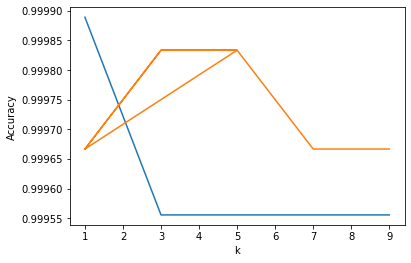

In [46]:
#Plotting accuracies according to k

plt.plot(training_array_results, training_array)
plt.plot(test_array_results, test_array)
plt.xlabel("k")
plt.ylabel("Accuracy")